#### Computational Physics - Fall 2020
#### Shalma Wegsman

## Homework #3

### Problem 1
(A) Exercise 4.3 in Newman

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [141]:
def DerivativeAt1(f,delta):
    deriv = (f(1 + delta) - f(1))/delta
    return deriv

In [142]:
def f(x):
    val = x*(x-1)
    return val

In [143]:
DerivativeAt1(f,1e-2)

1.010000000000001

Note that analytically, the derivative of f(x)=x(x-1)
is df/dx = 2x - 1. So at x=1, we should get 1. This doesn't perfectly agree with our result due to the approximation error of using delta=1e-2 instead of taking the limit to zero.

In [144]:
delta_exp = np.arange(2,16,2)
delta_list = [10.**(-i) for i in delta_exp]

results = []
for delta in delta_list:
    derive = DerivativeAt1(f,delta)
    results.append(derive)

Text(0.5, 1.0, 'Error in Numerical Derivative of f(x)=x(x-1) at x=1')

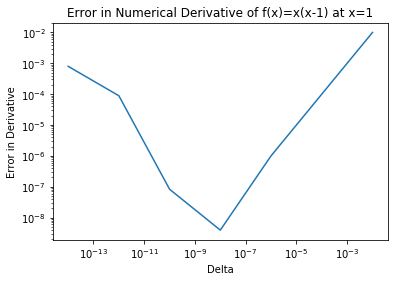

In [145]:
error = [i - 1 for i in results]
plt.plot(delta_list,np.abs(error))
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Delta')
plt.ylabel('Error in Derivative')
plt.title('Error in Numerical Derivative of f(x)=x(x-1) at x=1')

As delta gets smaller until around 1e-8, the error in the derivative calculation decreases. However, lower than 1e-8 the error increases again due to round-off error from doing computations with very small numbers

(B) 


Now we want to fit both sources of error to power laws. For a power-law y = Ax^b, we convert to a linear regression: log y = log A + b*log x


[-8.0, -10.0, -12.0, -14.0]
Approx Error =  1.5966764959603312 x^ 11.50712593823306
Round-off Error =  8.202023745465907e-17 x^ 0.11274495713988075


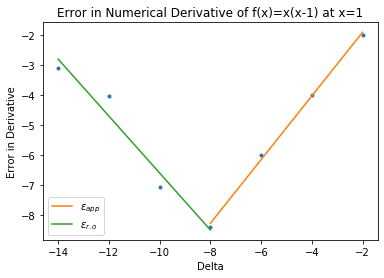

In [114]:
delta_log = [np.log10(i) for i in delta_list]
error_log = [np.log10(np.abs(i)) for i in error]

fit_app = np.polyfit(delta_log[0:4],error_log[0:4],1)
fit_ro = np.polyfit(delta_log[3:],error_log[3:],1)
print(delta_log[3:])

print('Approx Error = ',10**(fit_app[1]),'x^',10**(fit_app[0]))
print('Round-off Error = ',10**(fit_ro[1]),'x^',10**(fit_ro[0]))

plt.plot(delta_log,error_log,'.')
plt.xlabel('Delta')
plt.ylabel('Error in Derivative')
plt.title('Error in Numerical Derivative of f(x)=x(x-1) at x=1')

x_app = np.linspace(delta_log[3],delta_log[0],10)
y_app = fit_app[1] + fit_app[0]*x_app

x_ro = np.linspace(delta_log[6],delta_log[3],10)
y_ro = fit_ro[1] + fit_ro[0]*x_ro

plt.plot(x_app,y_app,label='$\\epsilon_{app}$')
plt.plot(x_ro,y_ro,label='$\\epsilon_{r.o}$')

plt.legend()

(C)

We want to find the value of delta which minimizes the error. We can do this by taking the derivative of eps = eps_app + eps_ro with respect to delta and setting it to zero.

(note: we write x as delta)

$\epsilon = \epsilon_{app} + \epsilon_{ro} = 1.5966764959603312 x^{ 11.50712593823306} + 8.202023745465907e-17 x^{0.11274495713988075}$

$\epsilon = A x^{B} + C x^{D}$

$\frac{d \epsilon}{dx} = AB x^{B-1} + CDx^{D-1} = 0$

$AB x^{B-1} = -CDx^{D-1}$

$-\frac{AB}{CD} = x^{D-1-B+1}$

$-\frac{AB}{CD} = x^{D-B}$

$log(-\frac{AB}{CD}) = (D-B)log(x)$

$log((-\frac{AB}{CD})^{(D-B)^{-1}}) = log(x)$

$x = (-\frac{AB}{CD})^{(D-B)^{-1}}$

Plugging in for A,B,C,D gives us:

In [124]:
A = 10**(fit_app[1])
B = (fit_app[0])
C = 10**(fit_ro[1])
D = (fit_ro[0])
delta1 = (-A*B/(C*D))**(1/(D-B))
print(delta1)

7.361258455651144e-09


Let's compare this to the value of delta where eps_ro = eps_app:

In [18]:
delta_exp = (fit_app[1] - fit_ro[1])/(fit_ro[0]-fit_app[0])
delta = 10**delta_exp
print(delta)

7.785975253769607e-09


In [139]:
fraction_diff = (7.785975253769607-7.361258455651144)/7.785975253769607
print(fraction_diff)

0.054548952992476425


### Problem 2
(A)

The nth term in the series is $\frac{(-1)^n x^n}{n!}$
and the (n-1)th term is $\frac{(-1)^{n-1}x^{n-1}}{(n-1)!}$, so:

nth term = (n-1)th term times $\frac{-x}{n}$

In [40]:
#based on the algorithm from class:
def exp(x,tol):
    exp=np.float32(1.)
    newterm=exp
    n=0
    diff=100.
    while diff > tol:
        n+=1
        newterm*=-x/n
        diff=np.absolute(newterm/exp)
        exp+=newterm
    return (exp,n)

In [41]:
exp(2,0.00001)

(0.13533511755733985, 13)

(B)

In [48]:
#For x = 1:
val_sum = exp(1,1e-7)
print("Series Result: ",val_sum[0])

val_exact = np.exp(-1)
print("Exact Result: ",val_exact)

Series Result:  0.367879439233606
Exact Result:  0.36787944117144233


C:\Users\shalm\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [47]:
#For x = 0.5:
val_sum = exp(0.5,1e-7)
print("Series Result: ",val_sum[0])

val_exact = np.exp(-1/2)
print("Exact Result: ",val_exact)

Series Result:  0.6065306594552606
Exact Result:  0.6065306597126334


(C)

In [63]:
x = []
x1 = np.arange(1,10)
x2 = np.arange(10,101,10)
for i in x1:
    x.append(i)
for j in x2:
    x.append(j)

print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


C:\Users\shalm\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Error in Calulation of exp(-x)')

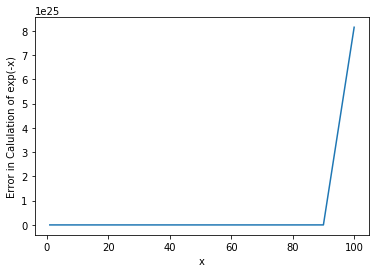

In [71]:
value_sum = []
value_exact = []
error = []
for i in x:
    val_sum = exp(i,1e-7)[0]
    val_exact = np.exp(-i)
    value_sum.append(val_sum)
    value_exact.append(val_exact)
    err = np.abs(val_sum - val_exact)
    error.append(err)
plt.plot(x,error)
plt.xlabel('x')
plt.ylabel('Error in Calulation of exp(-x)')

Clearly this error blows up around x = 90.

(D)

C:\Users\shalm\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Text(0.5, 1.0, 'x = 1')

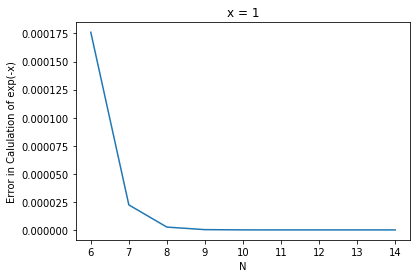

In [83]:
#First for x = 1
x = 1
tol = np.arange(-10,-1)
toler = [10.**i for i in tol]

error = []
N = []
for t in toler:
    result = exp(x,t)
    exact = np.exp(-1)
    NN = result[1]
    N.append(NN)
    err = np.abs(result[0] - exact)
    error.append(err)

plt.plot(N,error)
plt.xlabel('N')
plt.ylabel('Error in Calulation of exp(-x)')
plt.title('x = 1')

Text(0.5, 1.0, 'x = 3')

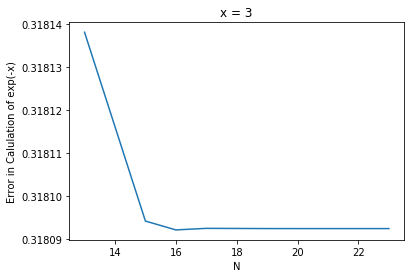

In [84]:
#Then x = 3
x = 3
tol = np.arange(-10,-1)
toler = [10.**i for i in tol]

error = []
N = []
for t in toler:
    result = exp(x,t)
    exact = np.exp(-1)
    NN = result[1]
    N.append(NN)
    err = np.abs(result[0] - exact)
    error.append(err)

plt.plot(N,error)
plt.xlabel('N')
plt.ylabel('Error in Calulation of exp(-x)')
plt.title('x = 3')

Text(0.5, 1.0, 'x = 12')

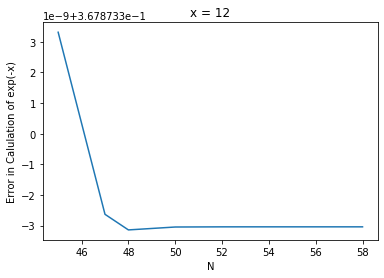

In [85]:
#Then x = 12
x = 12
tol = np.arange(-10,-1)
toler = [10.**i for i in tol]

error = []
N = []
for t in toler:
    result = exp(x,t)
    exact = np.exp(-1)
    NN = result[1]
    N.append(NN)
    err = np.abs(result[0] - exact)
    error.append(err)

plt.plot(N,error)
plt.xlabel('N')
plt.ylabel('Error in Calulation of exp(-x)')
plt.title('x = 12')

Text(0.5, 1.0, 'x = 100')

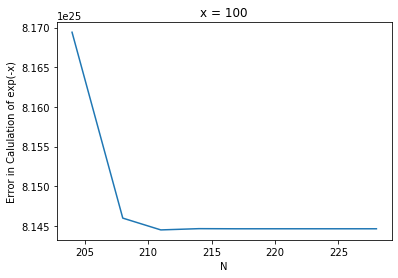

In [87]:
#Then x = 100
x = 100
tol = np.arange(-10,-1)
toler = [10.**i for i in tol]

error = []
N = []
for t in toler:
    result = exp(x,t)
    exact = np.exp(-1)
    NN = result[1]
    N.append(NN)
    err = np.abs(result[0] - exact)
    error.append(err)

plt.plot(N,error)
plt.xlabel('N')
plt.ylabel('Error in Calulation of exp(-x)')
plt.title('x = 100')

### Problem 3
(A)

In [158]:
def fib_fnc(N):
    fib =[1,1]
    for i in range(2,N):
        new_fib = fib[i-1]+fib[i-2]
        fib.append(new_fib)
    return(fib)

In [159]:
def pib_fnc(N):
    pib = [1,1]
    c = 1. + np.sqrt(3.)/100.
    for i in range(2,N):
        new_pib = c*pib[i-1]+pib[i-2]
        pib.append(new_pib)
    return(pib)

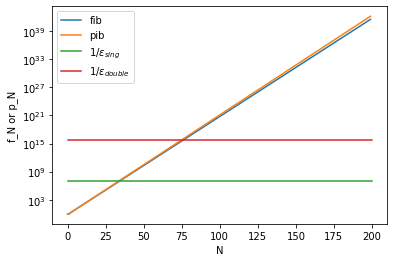

In [160]:
N = np.arange(200)
f = fib_fnc(200)
p = pib_fnc(200)

eps_single = np.finfo(np.float32).eps
eps_double = np.finfo(np.float64).eps

x = np.linspace(0,200,10)
y_sing = [1/eps_single]*10
y_double = [1/eps_double]*10

plt.plot(N,f,label='fib')
plt.plot(N,p,label='pib')
plt.plot(x,y_sing,label='$1/\epsilon_{sing}$')
plt.plot(x,y_double,label='$1/\epsilon_{double}$')

plt.yscale('log')
plt.xlabel('N')
plt.ylabel('f_N or p_N')
plt.legend()

(B)

In [202]:
def fibReverse_double(N):
    fib1 = np.float(fib_fnc(N)[N-1])
    fib2 = np.float(fib_fnc(N-1)[N-2])
    fib =np.zeros(N)
    fib[N-1]=fib1
    fib[N-2]=fib2
    for i in reversed(range(0,N-2)):
        new_fib = fib[i+2]-fib[i+1]
        fib[i]=new_fib
    return(fib)

def fibReverse_single(N):
    fib1 = np.float32(fib_fnc(N)[N-1])
    fib2 = np.float32(fib_fnc(N-1)[N-2])
    fib =np.zeros(N)
    fib[N-1]=fib1
    fib[N-2]=fib2
    for i in reversed(range(0,N-2)):
        new_fib = fib[i+2]-fib[i+1]
        fib[i]=new_fib
    return(fib)

In [279]:
fibReverse_double(10)

array([ 1.,  1.,  2.,  3.,  5.,  8., 13., 21., 34., 55.])

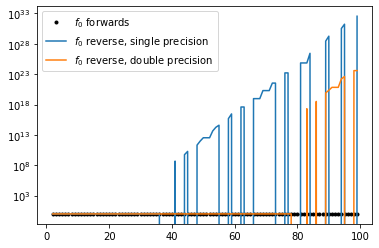

In [278]:
N = np.arange(2,100,1)
orig=[]
for n in N:
    x = fib_fnc(n)[0]
    orig.append(x)
    
reverse_single=[]
for n in N:
    x = fibReverse_single(n)[0]
    reverse_single.append(x)

reverse_double=[]
for n in N:
    x = fibReverse_double(n)[0]
    reverse_double.append(x)

#reverse_single_error = [np.abs(i-1.) for i in reverse_single]    
#reverse_double_error = [np.abs(i-1.) for i in reverse_double]    
#orig_error = [np.abs(i-1.) for i in orig]


plt.plot(N, orig,'k.',label='$f_0$ forwards')
plt.plot(N,reverse_single,label='$f_0$ reverse, single precision')
plt.plot(N,reverse_double,label='$f_0$ reverse, double precision')
plt.yscale('log')
plt.legend()

So for single-precision, the recomputed f0 loses accuracy around N=40, and for double-precision it loses accuracy around N=80. That's twice as good! (half as bad?)

(C)

In [287]:
def pibReverse_double(N):
    fib1 = np.float64(pib_fnc(N)[N-1])
    fib2 = np.float64(pib_fnc(N-1)[N-2])
    fib =np.zeros(N)
    fib[N-1]=fib1
    fib[N-2]=fib2
    for i in reversed(range(0,N-2)):
        new_fib = np.float64(fib[i+2]-fib[i+1])
        fib[i]=new_fib
    return(fib)

def pibReverse_single(N):
    fib1 = np.float32(pib_fnc(N)[N-1])
    fib2 = np.float32(pib_fnc(N-1)[N-2])
    fib =np.zeros(N)
    fib[N-1]=fib1
    fib[N-2]=fib2
    for i in reversed(range(0,N-2)):
        new_fib = fib[i+2]-fib[i+1]
        fib[i]=new_fib
    return(fib)

In [289]:
pibReverse_single(4)

array([0.9823792 , 1.0349412 , 2.01732039, 3.05226159])

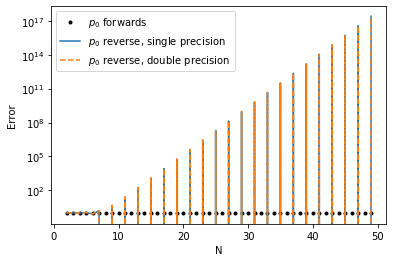

In [295]:
N = np.arange(2,50,1)
orig=[]
for n in N:
    x = pib_fnc(n)[0]
    orig.append(x)
    
reverse_single=[]
for n in N:
    x = pibReverse_single(n)[0]
    reverse_single.append(x)

reverse_double=[]
for n in N:
    x = pibReverse_double(n)[0]
    reverse_double.append(x)

plt.plot(N, orig,'k.',label='$p_0$ forwards')
plt.plot(N,reverse_single,label='$p_0$ reverse, single precision')
plt.plot(N,reverse_double,'--',label='$p_0$ reverse, double precision')
plt.yscale('log')
plt.ylabel('Error')
plt.xlabel('N')
plt.legend()

Precision is lost much more quickly in the "pibinocci" case. Although there is no longer a difference between the single and double precision calculations. 

We can see that the error increases with N with approximately the relation:
E ~ 125N - 100